# Second-level form signatures

Some signature types are furhter subdivided to get a more fine-grain classification. This notebook generates second-level signatures for cluster 4 (city centres) and cluster 2 (residential neighbourhoods).

The method mirrors top-level clustering.

In [1]:
import dask.dataframe
import pandas as pd
import numpy as np

from clustergram import Clustergram

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve

In [4]:
data = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").set_index('hindex')
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)
%time data = data.compute()
data

CPU times: user 1min 7s, sys: 42.8 s, total: 1min 49s
Wall time: 1min 50s


sdbAre_q1  sdbAre_q2  sdbAre_q3  sdbPer_q1  sdbPer_q2  \
hindex                                                                    
c000e094707t0000  -0.947406  -0.371977   0.020285  -0.901199  -0.237045   
c000e094763t0000  -0.913567  -0.420861  -0.271703  -0.903627  -0.428003   
c000e094763t0001  -0.878137  -0.411587  -0.284021  -0.900393  -0.416250   
c000e094763t0002  -0.952475  -0.421566  -0.283919  -0.968400  -0.429947   
c000e094764t0000  -0.964878  -0.420861  -0.271703  -0.972440  -0.420006   
...                     ...        ...        ...        ...        ...   
c102e644989t0111  -0.311466  -0.431706  -0.373463  -0.082269  -0.459270   
c102e644989t0112  -0.326671  -0.461825  -0.371855  -0.149873  -0.528701   
c102e644989t0113  -0.094236  -0.364761  -0.304254   0.024972  -0.347371   
c102e644989t0114  -0.477667  -0.568464  -0.390033  -0.600170  -0.646516   
c102e644989t0115  -0.413094  -0.545952  -0.382834  -0.400108  -0.610332   

                  sdbPer_q3  sdbCoA_q1  sdbCoA_q2  sdbCoA_q3  ssbCCo_q1  ...  \
hindex                                                                   ...   
c000e094707t0000  -0.023143  -0.000419  -0.001515  -0.010221  -0.046170  ...   
c000e094763t0000  -0.336729  -0.000419  -0.001515  -0.010221  -0.035325  ...   
c000e094763t0001  -0.350010  -0.000419  -0.001515  -0.010221  -0.034917  ...   
c000e094763t0002  -0.343165  -0.000419  -0.001515  -0.010221  -0.065649  ...   
c000e094764t0000  -0.315861  -0.000419  -0.001515  -0.010221  -0.066832  ...   
...                     ...        ...        ...        ...        ...  ...   
c102e644989t0111  -0.389532  -0.000419  -0.001515  -0.010221   0.132837  ...   
c102e644989t0112  -0.386678  -0.000419  -0.001515  -0.010221   0.136559  ...   
c102e644989t0113  -0.283669  -0.000419  -0.001515  -0.010221   0.021411  ...   
c102e644989t0114  -0.472676  -0.000419  -0.001515  -0.010221   0.424887  ...   
c102e644989t0115  -0.440413  -0.000419  -0.001515  -0.010221   0.160613  ...   

                  lseCWA_q3  lteOri_q1  lteOri_q2  lteOri_q3  lteWNB_q1  \
hindex                                                                    
c000e094707t0000   0.073064   0.031571   0.196520   0.424415  -0.611681   
c000e094763t0000  -0.254395  -1.016655  -0.161371   0.011093   0.148709   
c000e094763t0001  -0.285074  -0.897625  -0.161371   0.103698   0.148709   
c000e094763t0002  -0.280682  -0.927382  -0.161371   0.177408   0.302689   
c000e094764t0000  -0.280682  -1.016655  -0.104108   0.185348   0.302689   
...                     ...        ...        ...        ...        ...   
c102e644989t0111   0.199797   1.288365   0.440493   0.197816  -0.351250   
c102e644989t0112   0.195101   1.288365   0.440493   0.290197  -0.351250   
c102e644989t0113   0.199797   1.288365   0.440493   0.197816  -0.351250   
c102e644989t0114   0.008079  -0.855901   0.189420  -0.560233  -0.341815   
c102e644989t0115   0.008079  -0.203827   0.440493   0.231812  -0.351250   

                  lteWNB_q2  lteWNB_q3  lieWCe_q1  lieWCe_q2  lieWCe_q3  
hindex                                                                   
c000e094707t0000  -0.502087  -0.311160  -0.022562  -0.002733  -0.004738  
c000e094763t0000   0.214520  -0.125943  -0.019044  -0.002654  -0.004738  
c000e094763t0001   0.250036  -0.200268  -0.019323  -0.002654  -0.004738  
c000e094763t0002   0.250036  -0.120718  -0.018825  -0.002654  -0.004738  
c000e094764t0000   0.250036  -0.105044  -0.018825  -0.002659  -0.004738  
...                     ...        ...        ...        ...        ...  
c102e644989t0111  -0.580453  -0.704637  -0.000200  -0.002667  -0.004738  
c102e644989t0112  -0.580453  -0.693005  -0.000669  -0.002667  -0.004738  
c102e644989t0113  -0.580453  -0.704637  -0.000843  -0.002667  -0.004738  
c102e644989t0114  -0.580453  -0.704637  -0.000898  -0.002667  -0.004738  
c102e644989t0115  -0.580453  -0.638809  -0.000200  -0.002543  -0.004738  

[14539578 rows x 177 columns]

In [18]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/k8_form_labels.pq")

In [7]:
labels

k8
hindex              
c000e094707t0000   0
c000e094763t0000   5
c000e094763t0001   5
c000e094763t0002   5
c000e094764t0000   5
...               ..
c102e644989t0111   5
c102e644989t0112   5
c102e644989t0113   5
c102e644989t0114   5
c102e644989t0115   5

[14539578 rows x 1 columns]

## Sub-cluster cluster 4 - city centres

In [6]:
data4 = data.loc[labels.k8 == 4]

In [9]:
data4

sdbAre_q1  sdbAre_q2  sdbAre_q3  sdbPer_q1  sdbPer_q2  \
hindex                                                                    
c000e107372t0002   1.997072   3.173554   3.431442   2.381685   3.646422   
c000e107372t0010   2.164604   3.308433   3.511512   2.585743   3.829118   
c000e107372t0012   2.729738   3.553431   4.137457   3.176768   4.265299   
c000e107372t0013   1.967667   3.173554   3.443331   2.354584   3.651031   
c000e107422t0000   2.462707   3.207867   3.417761   2.863785   3.795187   
...                     ...        ...        ...        ...        ...   
c102e622622t0000   3.318605   4.274405   3.738178   3.395862   4.643282   
c102e622625t0000   2.522595   3.932338   3.591517   2.831547   4.471648   
c102e622626t0000   2.526626   3.827721   3.464678   2.825567   4.322319   
c102e622628t0000   2.534710   3.934916   3.464678   2.911231   4.408819   
c102e622628t0001   3.476486   4.774477   4.109019   3.536899   5.282891   

                  sdbPer_q3  sdbCoA_q1  sdbCoA_q2  sdbCoA_q3  ssbCCo_q1  ...  \
hindex                                                                   ...   
c000e107372t0002   3.669080  -0.000419  -0.001515  -0.010221  -1.996404  ...   
c000e107372t0010   3.713482  -0.000419  -0.001515  -0.010221  -2.109033  ...   
c000e107372t0012   3.745213  -0.000419  -0.001515  -0.010221  -2.170382  ...   
c000e107372t0013   3.680568  -0.000419  -0.001515  -0.010221  -2.083765  ...   
c000e107422t0000   3.534562  -0.000419  -0.001515  -0.010221  -2.121805  ...   
...                     ...        ...        ...        ...        ...  ...   
c102e622622t0000   3.753382  -0.000419  -0.001515  -0.010221  -2.073967  ...   
c102e622625t0000   3.728486  -0.000419  -0.001515  -0.010221  -1.985255  ...   
c102e622626t0000   3.620417  -0.000419  -0.001515  -0.010221  -1.998828  ...   
c102e622628t0000   3.611973  -0.000419  -0.001515  -0.010221  -2.073967  ...   
c102e622628t0001   4.110794  -0.000419  -0.001515  -0.010221  -2.078704  ...   

                  lseCWA_q3  lteOri_q1  lteOri_q2  lteOri_q3  lteWNB_q1  \
hindex                                                                    
c000e107372t0002  -0.522584   0.983963   0.745832   0.837519   4.797356   
c000e107372t0010  -0.520422   0.798750   0.731379   0.837519   4.717725   
c000e107372t0012  -0.524478   0.798750   0.693735   0.747528   4.797356   
c000e107372t0013  -0.523554   0.983963   0.715065   0.837519   4.797356   
c000e107422t0000  -0.522584   0.754407   0.693735   0.687751   4.797356   
...                     ...        ...        ...        ...        ...   
c102e622622t0000  -0.424137  -0.139501  -0.173680   0.013847   1.364289   
c102e622625t0000  -0.409997  -0.139501  -0.177055   0.125136   1.401938   
c102e622626t0000  -0.409997  -0.139501  -0.182284   0.017117   1.401938   
c102e622628t0000  -0.409997  -0.139501  -0.186138  -0.008321   1.401938   
c102e622628t0001  -0.409997  -0.139501  -0.173680   0.020030   1.401938   

                  lteWNB_q2  lteWNB_q3  lieWCe_q1  lieWCe_q2  lieWCe_q3  
hindex                                                                   
c000e107372t0002   5.578383   4.357864   0.014891  -0.002173  -0.004738  
c000e107372t0010   5.578383   4.357864   0.015162  -0.002176  -0.004738  
c000e107372t0012   5.567115   4.155360   0.015399  -0.002143  -0.004738  
c000e107372t0013   5.578383   4.357864   0.014891  -0.002170  -0.004738  
c000e107422t0000   5.578383   4.155360   0.011516  -0.002191  -0.004738  
...                     ...        ...        ...        ...        ...  
c102e622622t0000   1.089578   1.749723  -0.019645  -0.002505  -0.004738  
c102e622625t0000   0.946820   1.582395  -0.019810  -0.002618  -0.004738  
c102e622626t0000   0.972979   1.588049  -0.019810  -0.002549  -0.004738  
c102e622628t0000   1.000942   1.704424  -0.019810  -0.002612  -0.004738  
c102e622628t0001   1.000942   1.739099  -0.019810  -0.002612  -0.004738  

[151529 rows x 177 columns]

In [10]:
cgram = Clustergram(range(1, 25), method='kmeans', n_init=1000, random_state=42)
cgram.fit(data4)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 223.70374631881714 seconds.
K=3 fitted in 333.39103651046753 seconds.
K=4 fitted in 437.369651556015 seconds.
K=5 fitted in 458.2662000656128 seconds.
K=6 fitted in 452.7728068828583 seconds.
K=7 fitted in 518.857358455658 seconds.
K=8 fitted in 587.6459379196167 seconds.
K=9 fitted in 653.4005665779114 seconds.
K=10 fitted in 678.1721639633179 seconds.
K=11 fitted in 711.1682510375977 seconds.
K=12 fitted in 751.6350464820862 seconds.
K=13 fitted in 807.3923723697662 seconds.
K=14 fitted in 853.3511779308319 seconds.
K=15 fitted in 932.3701865673065 seconds.
K=16 fitted in 995.8812532424927 seconds.
K=17 fitted in 1108.2942202091217 seconds.
K=18 fitted in 1234.5389964580536 seconds.
K=19 fitted in 1337.2205052375793 seconds.
K=20 fitted in 1443.92027926445 seconds.
K=21 fitted in 1547.2303636074066 seconds.
K=22 fitted in 1629.5858244895935 seconds.
K=23 fitted in 1661.619954109192 seconds.
K=24 fitted in 1744.3388550281525

In [11]:
import urbangrammar_graphics as ugg
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [12]:
fig = cgram.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)
show(fig)

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

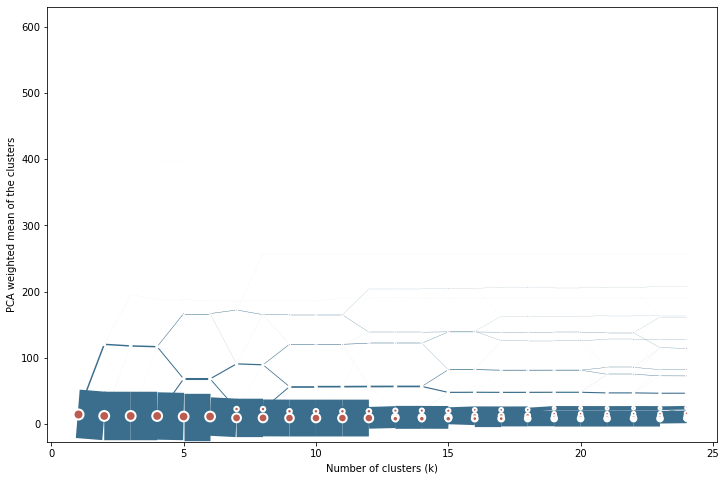

In [13]:
cgram.plot(
    figsize=(12, 8),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)

<AxesSubplot:>

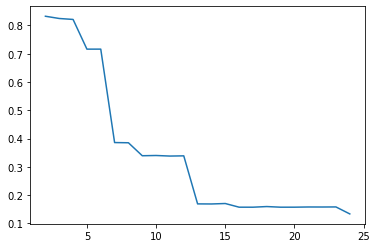

In [14]:
cgram.silhouette_score().plot()

<AxesSubplot:>

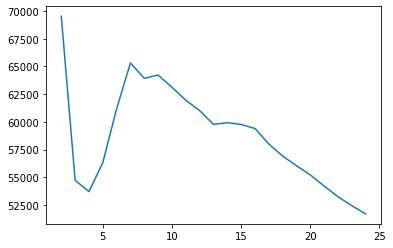

In [15]:
cgram.calinski_harabasz_score().plot()

<AxesSubplot:>

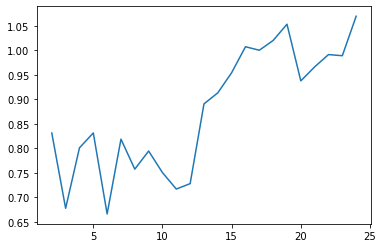

In [16]:
cgram.davies_bouldin_score().plot()

In [17]:
labels = cgram.labels.copy()
labels.columns = labels.columns.astype("str")  # parquet require str column names
labels.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c4_form_labels.pq")

In [18]:
import pickle

with open("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c4_form_centers.pickle",'wb') as f:
    pickle.dump(cgram.cluster_centers, f)

In [7]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c4_form_labels.pq")
labels.index = data4.index

In [8]:
centres = []
for i in range(103):
    geom = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/tessellation/tess_{i}.pq", columns=["tessellation", "hindex"]).set_index("hindex")
    geom = geom.merge(labels, how="inner", left_index=True, right_index=True)
    centres.append(geom)
    print(f"Chunk {i} done.")

Chunk 0 done.
Chunk 1 done.
Chunk 2 done.
Chunk 3 done.
Chunk 4 done.
Chunk 5 done.
Chunk 6 done.
Chunk 7 done.
Chunk 8 done.
Chunk 9 done.
Chunk 10 done.
Chunk 11 done.
Chunk 12 done.
Chunk 13 done.
Chunk 14 done.
Chunk 15 done.
Chunk 16 done.
Chunk 17 done.
Chunk 18 done.
Chunk 19 done.
Chunk 20 done.
Chunk 21 done.
Chunk 22 done.
Chunk 23 done.
Chunk 24 done.
Chunk 25 done.
Chunk 26 done.
Chunk 27 done.
Chunk 28 done.
Chunk 29 done.
Chunk 30 done.
Chunk 31 done.
Chunk 32 done.
Chunk 33 done.
Chunk 34 done.
Chunk 35 done.
Chunk 36 done.
Chunk 37 done.
Chunk 38 done.
Chunk 39 done.
Chunk 40 done.
Chunk 41 done.
Chunk 42 done.
Chunk 43 done.
Chunk 44 done.
Chunk 45 done.
Chunk 46 done.
Chunk 47 done.
Chunk 48 done.
Chunk 49 done.
Chunk 50 done.
Chunk 51 done.
Chunk 52 done.
Chunk 53 done.
Chunk 54 done.
Chunk 55 done.
Chunk 56 done.
Chunk 57 done.
Chunk 58 done.
Chunk 59 done.
Chunk 60 done.
Chunk 61 done.
Chunk 62 done.
Chunk 63 done.
Chunk 64 done.
Chunk 65 done.
Chunk 66 done.
Chunk

In [9]:
centres = pd.concat(centres)
centres

tessellation  1  2  3  \
hindex                                                                         
c000e603107t0010  POLYGON Z ((353104.312 428953.500 0.000, 35310...  0  0  1   
c000e603107t0005  POLYGON Z ((353161.950 428861.163 0.000, 35316...  0  0  1   
c000e603107t0002  POLYGON Z ((353164.871 428863.388 0.000, 35316...  0  0  1   
c000e603107t0001  POLYGON Z ((353228.443 428887.142 0.000, 35322...  0  0  1   
c000e603107t0046  POLYGON Z ((353199.359 428905.815 0.000, 35319...  0  0  1   
...                                                             ... .. .. ..   
c102e176047t0000  POLYGON ((389335.500 390318.500, 389335.260 39...  0  0  1   
c102e622611t0000  POLYGON Z ((389310.715 390333.480 0.000, 38930...  0  0  1   
c102e176008t0000  POLYGON ((389628.340 390455.480, 389631.670 39...  0  0  1   
c102e176032t0000  POLYGON ((389513.950 390446.240, 389511.600 39...  0  0  1   
c102e176009t0000  POLYGON ((389697.000 390453.000, 389684.500 39...  0  0  1   

                  4  5  6  7  8  9  ...  15  16  17  18  19  20  21  22  23  \
hindex                              ...                                       
c000e603107t0010  0  0  0  1  0  0  ...   0  14  16   2   8  14  17   0  20   
c000e603107t0005  0  0  0  1  0  0  ...   6  14  16   2   8  14  17   0  20   
c000e603107t0002  0  0  0  1  0  0  ...   6  14  16   2   8  14  17   0  20   
c000e603107t0001  0  0  0  1  0  0  ...   6  14  16   2   8  14  17   0  20   
c000e603107t0046  0  0  0  1  0  0  ...   0  14  16   2   8  14  17   0  20   
...              .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
c102e176047t0000  0  0  0  1  0  0  ...   0  14  16   2   8  14  17   0  20   
c102e622611t0000  0  0  0  1  0  0  ...   0  14  16   2   8  14  17   0  20   
c102e176008t0000  0  0  0  1  0  0  ...   0  14  16   2   8  14  17   0  20   
c102e176032t0000  0  0  0  1  0  0  ...   0  14  16   2   8  14  17   0  20   
c102e176009t0000  0  0  0  1  0  0  ...   0  14  16   2   8  14  17   0  20   

                  24  
hindex                
c000e603107t0010  10  
c000e603107t0005  10  
c000e603107t0002  10  
c000e603107t0001  10  
c000e603107t0046  10  
...               ..  
c102e176047t0000  13  
c102e622611t0000  13  
c102e176008t0000  13  
c102e176032t0000  13  
c102e176009t0000  13  

[151529 rows x 25 columns]

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve
import warnings 

warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [13]:
centres = centres.sort_values("9").rename_geometry("geometry")[["9", "geometry"]]
centres.columns = ["clusters", "geometry"]

In [14]:
ddf = dask_geopandas.from_geopandas(centres, npartitions=64)
spsig = dask_dissolve(ddf, by="clusters").compute().reset_index(drop=True).explode()
spsig

clusters                                           geometry
0 0         0  POLYGON Z ((561163.004 98706.648 0.000, 561162...
  1         0  POLYGON Z ((561058.798 98901.493 0.000, 561058...
  2         0  POLYGON Z ((561094.424 98999.714 0.000, 561094...
  3         0  POLYGON Z ((561375.250 98668.646 0.000, 561373...
  4         0  POLYGON Z ((581839.270 109316.360 0.000, 58183...
..        ...                                                ...
8 4         8  POLYGON ((525360.920 439284.060, 525426.290 43...
  5         8  POLYGON ((325927.377 1008792.072, 325925.002 1...
  6         8  POLYGON ((337778.576 1013435.780, 337547.856 1...
  7         8  POLYGON ((422300.000 1147850.000, 422360.000 1...
  8         8  POLYGON ((175943.494 878538.992, 175944.881 87...

[2954 rows x 2 columns]

In [15]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster4_k9_form_GB.pq")

In [16]:
spsig.geometry = spsig.simplify(2).buffer(.001).simplify(2)
spsig.to_file(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster4_k9_form_GB_simplified.geojson", driver="GeoJSON")
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster4_k9_form_GB_simplified.pq")

In [17]:
spsig.to_file(f"sub_signatures_cluster4_k9_form_GB_simplified.gpkg", driver="GPKG")

## Sub-cluster cluster 2

In [19]:
data2 = data.loc[labels.k8 == 2]

In [22]:
data2

sdbAre_q1  sdbAre_q2  sdbAre_q3  sdbPer_q1  sdbPer_q2  \
hindex                                                                    
c000e097916t0000   0.985252   0.392311   0.239016   1.017116   0.263269   
c000e097916t0001   0.986698   0.383377   0.202023   1.022926   0.259483   
c000e097916t0002   0.877057   0.295106   0.065275   0.930232   0.181706   
c000e097916t0003   0.875002   0.293485   0.048611   0.922951   0.175053   
c000e097916t0004   0.870884   0.273456   0.077266   0.906541   0.175053   
...                     ...        ...        ...        ...        ...   
c102e639768t0175   1.536862   0.925914   0.440663   1.422308   0.940510   
c102e639768t0181   1.488185   0.863399   0.424774   1.405489   0.771097   
c102e639768t0187   1.482975   0.897458   0.532788   1.394022   0.894187   
c102e639768t0188   1.428308   0.873805   0.472334   1.355474   0.821399   
c102e639768t0191   1.488643   0.887393   0.453780   1.413642   0.797336   

                  sdbPer_q3  sdbCoA_q1  sdbCoA_q2  sdbCoA_q3  ssbCCo_q1  ...  \
hindex                                                                   ...   
c000e097916t0000   0.190228  -0.000419  -0.001515  -0.010221  -0.007430  ...   
c000e097916t0001   0.151448  -0.000419  -0.001515  -0.010221   0.004062  ...   
c000e097916t0002   0.080218  -0.000419  -0.001515  -0.010221  -0.168096  ...   
c000e097916t0003   0.069451  -0.000419  -0.001515  -0.010221  -0.158833  ...   
c000e097916t0004   0.079372  -0.000419  -0.001515  -0.010221  -0.007396  ...   
...                     ...        ...        ...        ...        ...  ...   
c102e639768t0175   0.395441  -0.000419  -0.001515  -0.010221   0.564866  ...   
c102e639768t0181   0.383649  -0.000419  -0.001515  -0.010221   0.474682  ...   
c102e639768t0187   0.456136  -0.000419  -0.001515  -0.010221   0.428325  ...   
c102e639768t0188   0.394042  -0.000419  -0.001515  -0.010221   0.426544  ...   
c102e639768t0191   0.386862  -0.000419  -0.001515  -0.010221   0.432959  ...   

                  lseCWA_q3  lteOri_q1  lteOri_q2  lteOri_q3  lteWNB_q1  \
hindex                                                                    
c000e097916t0000  -0.491403  -0.736080  -1.117002  -0.704494   5.453053   
c000e097916t0001  -0.491403  -0.736080  -1.117002  -0.704494   5.453053   
c000e097916t0002  -0.484267  -0.692283  -1.129979  -1.485165   5.602077   
c000e097916t0003  -0.484267  -0.692283  -1.129979  -1.485165   5.602077   
c000e097916t0004  -0.484267  -0.692283  -1.117002  -1.064872   5.453053   
...                     ...        ...        ...        ...        ...   
c102e639768t0175  -0.361822  -1.536735  -0.651994  -0.313730   1.583308   
c102e639768t0181  -0.378234  -1.401278  -0.347396  -0.313730   1.491510   
c102e639768t0187  -0.378234  -1.401278  -0.465302  -0.313730   1.507224   
c102e639768t0188  -0.378234  -1.354317  -0.145154  -0.258014   0.933151   
c102e639768t0191  -0.378234  -1.373797  -0.145154  -0.258014   0.933151   

                  lteWNB_q2  lteWNB_q3  lieWCe_q1  lieWCe_q2  lieWCe_q3  
hindex                                                                   
c000e097916t0000   4.136105   3.871857   0.011462  -0.002189  -0.004738  
c000e097916t0001   4.136105   3.790504   0.011462  -0.002189  -0.004738  
c000e097916t0002   4.044032   3.396760   0.011051  -0.002180  -0.004738  
c000e097916t0003   4.044032   3.396760   0.010804  -0.002180  -0.004738  
c000e097916t0004   3.911090   3.396760   0.011462  -0.002180  -0.004738  
...                     ...        ...        ...        ...        ...  
c102e639768t0175   0.495236  -0.008730  -0.010412  -0.002268  -0.004738  
c102e639768t0181   0.495236   0.038071  -0.010412  -0.002375  -0.004738  
c102e639768t0187   0.495236   0.038071  -0.010412  -0.002375  -0.004738  
c102e639768t0188   0.495236   0.038071  -0.010287  -0.002387  -0.004738  
c102e639768t0191   0.495236   0.038071  -0.010287  -0.002387  -0.004738  

[3451451 rows x 177 columns]

In [23]:
cgram2 = Clustergram(range(1, 25), method='minibatchkmeans', n_init=1000, batch_size=250_000, random_state=42)
cgram2.fit(data2)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 1253.84738779068 seconds.
K=4 fitted in 1489.357971906662 seconds.
K=5 fitted in 1604.8212933540344 seconds.
K=6 fitted in 2255.956408262253 seconds.
K=7 fitted in 2376.1415071487427 seconds.
K=8 fitted in 2564.8916664123535 seconds.
K=9 fitted in 2696.464795589447 seconds.
K=10 fitted in 2815.596691131592 seconds.
K=11 fitted in 2937.35027718544 seconds.
K=12 fitted in 3052.864670753479 seconds.
K=13 fitted in 3176.3278625011444 seconds.
K=14 fitted in 3267.506118297577 seconds.
K=15 fitted in 3378.229498386383 seconds.
K=16 fitted in 3595.2608511447906 seconds.
K=17 fitted in 3743.807673215866 seconds.
K=18 fitted in 3869.714512348175 seconds.
K=19 fitted in 3994.5937445163727 seconds.
K=20 fitted in 4112.138377189636 seconds.
K=21 fitted in 4360.403252840042 seconds.
K=22 fitted in 4497.992453098297 seconds.
K=23 fitted in 4609.6327838897705 seconds.
K=24 fitted in 4723.576930522919 seconds.


In [24]:
import urbangrammar_graphics as ugg
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [27]:
fig = cgram2.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)
show(fig)

In [37]:
fig = cgram2.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2,
    pca_weighted=False,
)
show(fig)

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

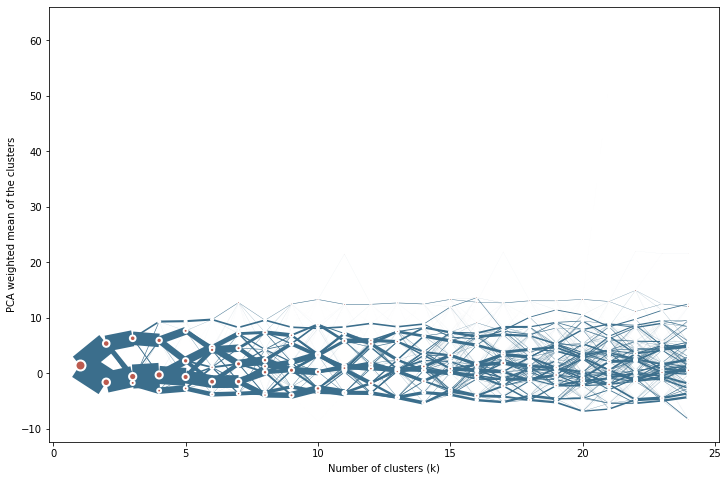

In [28]:
cgram2.plot(
    figsize=(12, 8),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)

<AxesSubplot:>

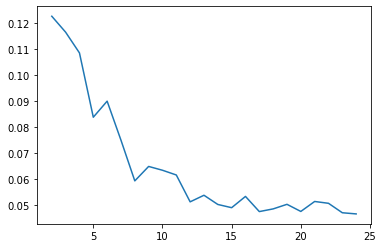

In [33]:
cgram2.silhouette_score(sample_size=100_000).plot()

<AxesSubplot:>

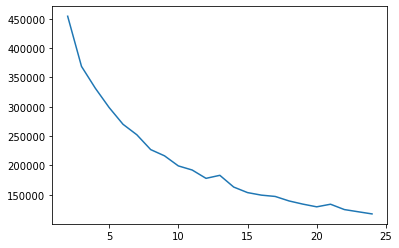

In [34]:
cgram2.calinski_harabasz_score().plot()

<AxesSubplot:>

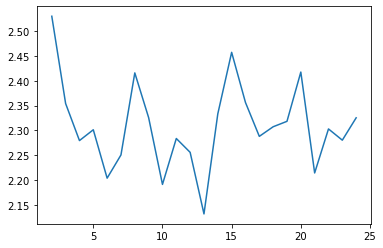

In [35]:
cgram2.davies_bouldin_score().plot()

In [31]:
labels2 = cgram2.labels.copy()
labels2.columns = labels2.columns.astype("str")  # parquet require str column names
labels2.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c2_form_labels.pq")

In [32]:
import pickle

with open("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c2_form_centers.pickle",'wb') as f:
    pickle.dump(cgram.cluster_centers, f)

In [20]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_c2_form_labels.pq")
labels.index = data2.index

In [21]:
centres = []
for i in range(103):
    geom = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/tessellation/tess_{i}.pq", columns=["tessellation", "hindex"]).set_index("hindex")
    geom = geom.merge(labels, how="inner", left_index=True, right_index=True)
    centres.append(geom)
#     print(f"Chunk {i} done.")

In [22]:
centres = pd.concat(centres)
centres

tessellation  1  2  3  \
hindex                                                                         
c000e109777t0000  POLYGON ((336287.376 427055.178, 336286.745 42...  0  0  2   
c000e109777t0001  POLYGON ((336192.633 427056.666, 336192.607 42...  0  0  2   
c000e109777t0002  POLYGON ((336202.056 427028.254, 336199.483 42...  0  0  2   
c000e109777t0003  POLYGON ((336194.678 427020.851, 336196.952 42...  0  0  2   
c000e109777t0004  POLYGON ((336220.377 427052.195, 336218.829 42...  0  0  2   
...                                                             ... .. .. ..   
c102e175168t0000  POLYGON ((389544.610 395201.290, 389537.980 39...  0  1  2   
c102e174147t0000  POLYGON ((389612.230 395260.630, 389612.620 39...  0  1  2   
c102e174145t0000  POLYGON ((389596.600 395295.390, 389604.800 39...  0  1  2   
c102e174143t0000  POLYGON ((389579.000 395340.000, 389587.800 39...  0  1  2   
c102e220091t0000  POLYGON ((402112.440 396148.780, 402126.770 39...  0  1  1   

                  4  5  6  7  8  9  ...  15  16  17  18  19  20  21  22  23  \
hindex                              ...                                       
c000e109777t0000  0  3  0  0  0  7  ...   5  14   6  12   2   6  10  14  10   
c000e109777t0001  0  3  0  0  0  7  ...   5  14   6  12   5   6  10  14  10   
c000e109777t0002  0  3  0  0  0  7  ...   5  14   6  12   2   6  10  14  10   
c000e109777t0003  0  3  0  0  0  7  ...   5  14   6  12   2   6  10  14  10   
c000e109777t0004  0  3  0  0  0  7  ...   5  14   6  12   2   6  10  14  10   
...              .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
c102e175168t0000  0  2  0  5  7  1  ...   5  14   3  14  15   6  19  21  10   
c102e174147t0000  0  2  0  5  7  7  ...   5  14   3  14  15   6  19  21  10   
c102e174145t0000  0  2  0  5  7  1  ...   5  14   3  14  15   6  19  21  10   
c102e174143t0000  0  2  0  5  7  7  ...   5  14   3  14  15   6  19  21  10   
c102e220091t0000  1  1  3  3  3  5  ...   4   7  15  13   1   5   8  17   2   

                  24  
hindex                
c000e109777t0000  17  
c000e109777t0001  17  
c000e109777t0002  17  
c000e109777t0003  17  
c000e109777t0004  17  
...               ..  
c102e175168t0000  10  
c102e174147t0000  10  
c102e174145t0000  10  
c102e174143t0000  10  
c102e220091t0000   1  

[3451451 rows x 25 columns]

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve
import warnings 

warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [23]:
centres = centres.sort_values("8").rename_geometry("geometry")[["8", "geometry"]]
centres.columns = ["clusters", "geometry"]

In [24]:
ddf = dask_geopandas.from_geopandas(centres, npartitions=64)
spsig = dask_dissolve(ddf, by="clusters").compute().reset_index(drop=True).explode()
spsig

clusters                                           geometry
0 0            0  POLYGON Z ((402994.820 79047.418 0.000, 402995...
  1            0  POLYGON Z ((402767.248 79523.698 0.000, 402767...
  2            0  POLYGON Z ((408792.283 93254.679 0.000, 408792...
  3            0  POLYGON Z ((408729.083 93264.282 0.000, 408729...
  4            0  POLYGON Z ((408780.799 93346.550 0.000, 408780...
...          ...                                                ...
7 3752         7  POLYGON Z ((266588.875 846189.606 0.000, 26658...
  3753         7  POLYGON Z ((309213.496 724405.657 0.000, 30921...
  3754         7  POLYGON Z ((309344.531 724481.375 0.000, 30934...
  3755         7  POLYGON Z ((310889.805 968260.309 0.000, 31088...
  3756         7  POLYGON Z ((311991.353 968558.291 0.000, 31199...

[49753 rows x 2 columns]

In [25]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster2_k8_form_GB.pq")

In [26]:
spsig.geometry = spsig.simplify(2).buffer(.001).simplify(2)
spsig.to_file(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster2_k8_form_GB_simplified.geojson", driver="GeoJSON")
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster2_k8_form_GB_simplified.pq")

In [27]:
spsig.to_file(f"sub_signatures_cluster2_k8_form_GB_simplified.gpkg", driver="GPKG")

Combine levels

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

spsig = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_form_K8_GB.pq")

In [3]:
level2_2 = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster2_k8_form_GB.pq")
level2_4 = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster4_k9_form_GB.pq")

In [6]:
level1 = spsig[~spsig.k8.isin([2, 4])]

In [7]:
level2_2["k8"] = 2
level2_4["k8"] = 4

In [9]:
level2_2.columns, level2_4.columns, level1.columns

(Index(['clusters', 'geometry', 'k8'], dtype='object'),
 Index(['clusters', 'geometry', 'k8'], dtype='object'),
 Index(['k8', 'tessellation'], dtype='object'))

In [11]:
level2_2.columns = ['level2', 'geometry', 'k8']
level2_4.columns = ['level2', 'geometry', 'k8']
level1 = level1.rename_geometry("geometry")
level1['level2'] = 0

In [13]:
combined = pd.concat([level1, level2_2, level2_4], axis=0)

In [14]:
combined = combined.reset_index(drop=True)

In [15]:
combined["signature_type"] = combined.k8.astype(str) + '_' + combined.level2.astype(int).astype(str)

In [16]:
combined.signature_type.nunique()

23

In [18]:
combined.to_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_form_combined_levels_orig.pq")

<ipython-input-18-dea8f4caae45>:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  combined.to_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_form_combined_levels_orig.pq")


In [19]:
import dask_geopandas

ddf = dask_geopandas.from_geopandas(combined, npartitions=512)
ddf.geometry = ddf.simplify(2).buffer(.001).simplify(2)
%time simplified = ddf.compute()

CPU times: user 28min 57s, sys: 4min 43s, total: 33min 41s
Wall time: 25min 55s


In [20]:
simplified.to_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_form_combined_levels_simplified.pq")

<ipython-input-20-dadb8c830952>:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  simplified.to_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_form_combined_levels_simplified.pq")


In [ ]:
simplified.to_file("signatures_form_combined_levels_simplified.gpkg", driver="GPKG")